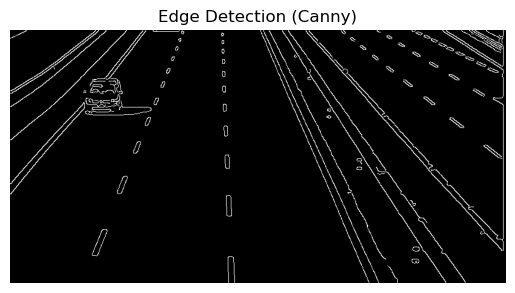

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Path to the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'hough_transform_road.png')  # Construct the full path to the image

# Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale mode

# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred_image, 50, 150)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis("off")
plt.show()


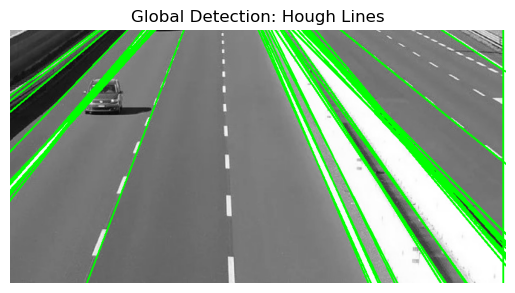

In [7]:
# Apply Hough Line Transform globally
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Draw detected lines on the original image
image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.imshow(image_with_lines)
plt.title("Global Detection: Hough Lines")
plt.axis("off")
plt.show()


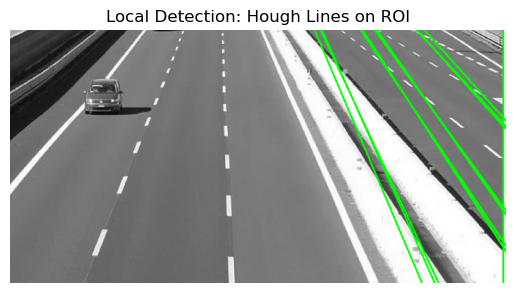

In [9]:
# Define Region of Interest (ROI)
height, width = edges.shape
roi = edges[int(height / 2):, :]  # Bottom half of the image

# Apply Hough Line Transform on ROI
lines_local = cv2.HoughLines(roi, 1, np.pi / 180, 100)

# Draw detected lines on the ROI
image_with_lines_local = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
if lines_local is not None:
    for line in lines_local:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image_with_lines_local, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
plt.imshow(image_with_lines_local)
plt.title("Local Detection: Hough Lines on ROI")
plt.axis("off")
plt.show()


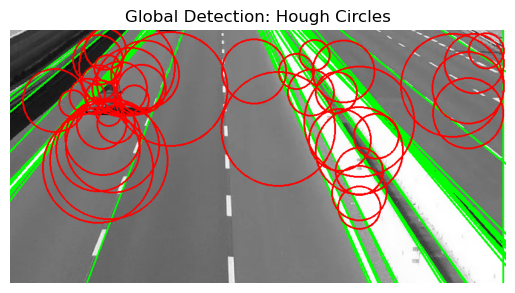

In [10]:
# Detect circles globally
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=100)

# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        cv2.circle(image_with_lines, (circle[0], circle[1]), circle[2], (255, 0, 0), 2)

# Display global circle detection
plt.imshow(image_with_lines)
plt.title("Global Detection: Hough Circles")
plt.axis("off")
plt.show()
